In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae


In [ ]:
import pandas as pd
import numpy as np
import utm
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.optimize import least_squares
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

      Latitude  Longitude   Average
MSE   0.000021   0.000004  0.000013
RMSE  0.004603   0.002093  0.003348
MAE   0.003821   0.001711  0.002766


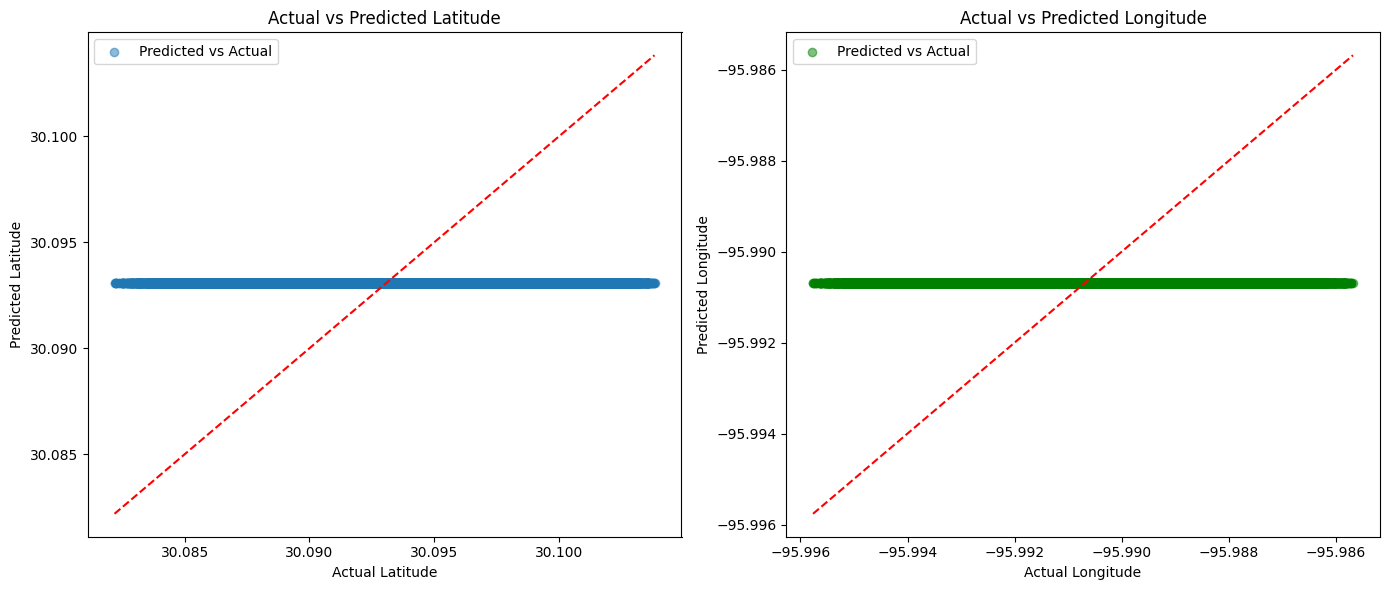

In [ ]:
'''SUPPORT VECTOR MACHINE'''

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'C:/Users/shouv/Downloads/data_from_tareq_bhai.csv'# Load data
  # Correct file path from the provided code
  # Update with the correct path
data = pd.read_csv(data_path)

# Prepare features and targets
X = data.drop(columns=['Node ID', 'Latitude', 'Longitude']).to_numpy()
y = data[['Latitude', 'Longitude']].to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train SVR model
svr = SVR(kernel='rbf')
multi_output_regressor = MultiOutputRegressor(svr)
multi_output_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = multi_output_regressor.predict(X_test)

# Define function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

# Calculate metrics for latitude
mse_lat, rmse_lat, mae_lat = calculate_metrics(y_test[:, 0], y_pred[:, 0])
# Calculate metrics for longitude
mse_lon, rmse_lon, mae_lon = calculate_metrics(y_test[:, 1], y_pred[:, 1])

# Average metrics
avg_mse = (mse_lat + mse_lon) / 2
avg_rmse = (rmse_lat + rmse_lon) / 2
avg_mae = (mae_lat + mae_lon) / 2

metrics = {
    "Latitude": {"MSE": mse_lat, "RMSE": rmse_lat, "MAE": mae_lat},
    "Longitude": {"MSE": mse_lon, "RMSE": rmse_lon, "MAE": mae_lon},
    "Average": {"MSE": avg_mse, "RMSE": avg_rmse, "MAE": avg_mae}
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plotting actual vs predicted values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5, label='Predicted vs Actual')
plt.title('Actual vs Predicted Latitude')
plt.xlabel('Actual Latitude')
plt.ylabel('Predicted Latitude')
plt.plot([min(y_test[:, 0]), max(y_test[:, 0])], [min(y_test[:, 0]), max(y_test[:, 0])], 'r--')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5, color='green', label='Predicted vs Actual')
plt.title('Actual vs Predicted Longitude')
plt.xlabel('Actual Longitude')
plt.ylabel('Predicted Longitude')
plt.plot([min(y_test[:, 1]), max(y_test[:, 1])], [min(y_test[:, 1]), max(y_test[:, 1])], 'r--')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/20
1350/1350 [==============================] - 5s 3ms/step - loss: 191.2811 - val_loss: 0.8032
Epoch 2/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.5198 - val_loss: 0.2497
Epoch 3/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.2988 - val_loss: 0.1534
Epoch 4/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.1941 - val_loss: 0.0843
Epoch 5/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.1572 - val_loss: 0.1094
Epoch 6/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.1178 - val_loss: 0.0276
Epoch 7/20
1350/1350 [==============================] - 3s 3ms/step - loss: 0.1000 - val_loss: 0.0876
Epoch 8/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0694 - val_loss: 0.0834
Epoch 9/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0687 - val_loss: 0.0124
Epoch 10/20
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0

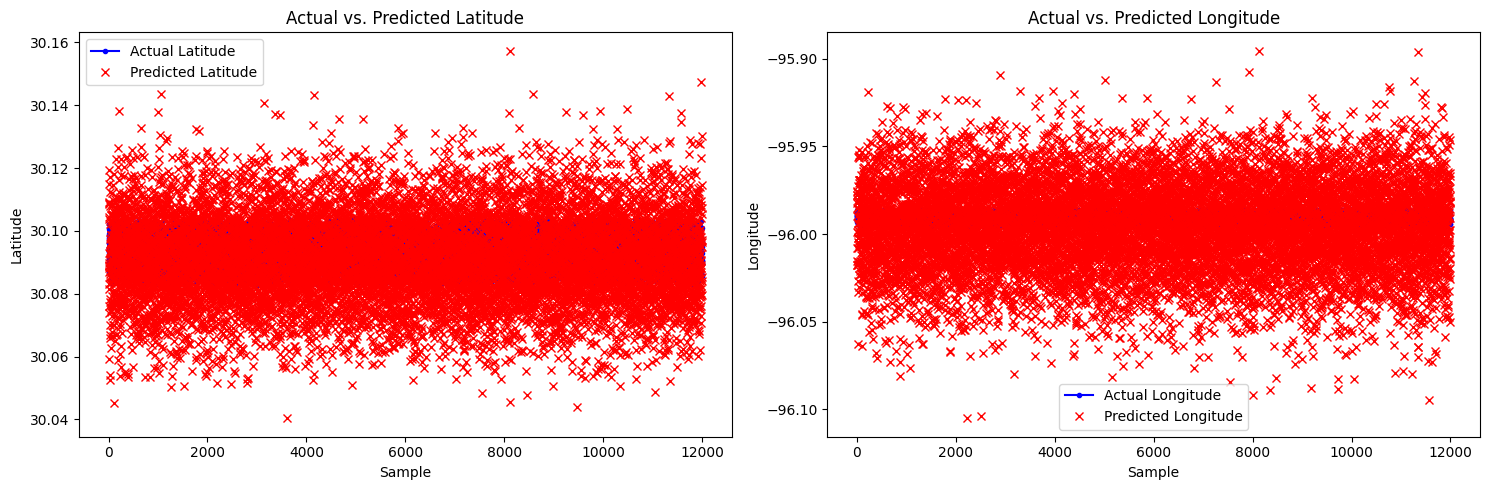

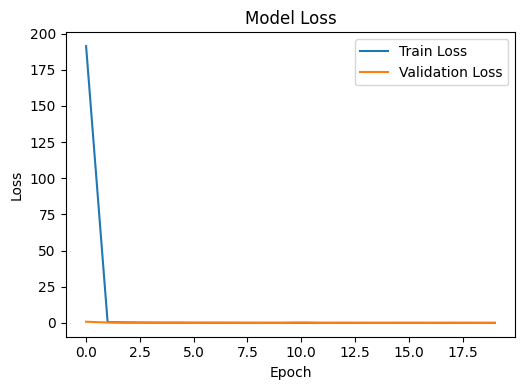

In [ ]:
'''LONG-SHORT TERM MEMORY'''

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

data = pd.read_csv(data_path)

# Prepare features and targets
features = data.drop(['Node ID', 'Latitude', 'Longitude'], axis=1)
targets = data[['Latitude', 'Longitude']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create sequences
def create_sequences(features, targets, time_steps=1):
    feature_sequences, target_sequences = [], []
    for i in range(len(features) - time_steps):
        feature_sequences.append(features[i:(i + time_steps)])
        target_sequences.append(targets[i + time_steps])
    return np.array(feature_sequences), np.array(target_sequences)

time_steps = 10
X, y = create_sequences(features_scaled, targets.to_numpy(), time_steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(2)  # Output layer with 2 neurons for latitude and longitude
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, verbose=1)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

# Calculate metrics for latitude
mse_lat, rmse_lat, mae_lat = calculate_metrics(y_test[:, 0], predictions[:, 0])
# Calculate metrics for longitude
mse_lon, rmse_lon, mae_lon = calculate_metrics(y_test[:, 1], predictions[:, 1])

# Average metrics
avg_mse = (mse_lat + mse_lon) / 2
avg_rmse = (rmse_lat + rmse_lon) / 2
avg_mae = (mae_lat + mae_lon) / 2

metrics = {
    "Latitude": {"MSE": mse_lat, "RMSE": rmse_lat, "MAE": mae_lat},
    "Longitude": {"MSE": mse_lon, "RMSE": rmse_lon, "MAE": mae_lon},
    "Average": {"MSE": avg_mse, "RMSE": avg_rmse, "MAE": avg_mae}
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plot actual vs predicted values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(y_test[:, 0], label='Actual Latitude', color='blue', marker='.')
plt.plot(predictions[:, 0], label='Predicted Latitude', color='red', linestyle='None', marker='x')
plt.title('Actual vs. Predicted Latitude')
plt.xlabel('Sample')
plt.ylabel('Latitude')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test[:, 1], label='Actual Longitude', color='blue', marker='.')
plt.plot(predictions[:, 1], label='Predicted Longitude', color='red', linestyle='None', marker='x')
plt.title('Actual vs. Predicted Longitude')
plt.xlabel('Sample')
plt.ylabel('Longitude')
plt.legend()
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1, Train Loss: 1508.7220, Test MSE: 32.0012, Test RMSE: 5.6570, Test MAE: 4.0337
Epoch 2, Train Loss: 166.1741, Test MSE: 17.9505, Test RMSE: 4.2368, Test MAE: 3.0568
Epoch 3, Train Loss: 137.8503, Test MSE: 7.3583, Test RMSE: 2.7126, Test MAE: 1.9877
Epoch 4, Train Loss: 112.5067, Test MSE: 1.9888, Test RMSE: 1.4103, Test MAE: 1.0672
Epoch 5, Train Loss: 94.2820, Test MSE: 2.2736, Test RMSE: 1.5078, Test MAE: 1.2653
Epoch 6, Train Loss: 84.9999, Test MSE: 0.1342, Test RMSE: 0.3664, Test MAE: 0.2645
Epoch 7, Train Loss: 77.2755, Test MSE: 1.0745, Test RMSE: 1.0366, Test MAE: 0.8269
Epoch 8, Train Loss: 72.6797, Test MSE: 0.7141, Test RMSE: 0.8451, Test MAE: 0.6869
Epoch 9, Train Loss: 70.7291, Test MSE: 0.9098, Test RMSE: 0.9538, Test MAE: 0.7095
Epoch 10, Train Loss: 67.1597, Test MSE: 1.1293, Test RMSE: 1.0627, Test MAE: 0.8558
Epoch 11, Train Loss: 66.2360, Test MSE: 0.6323, Test RMSE: 0.7952, Test MAE: 0.5684
Epoch 12, Train Loss: 65.1110, Test MSE: 1.2887, Test RMSE: 1.1352,

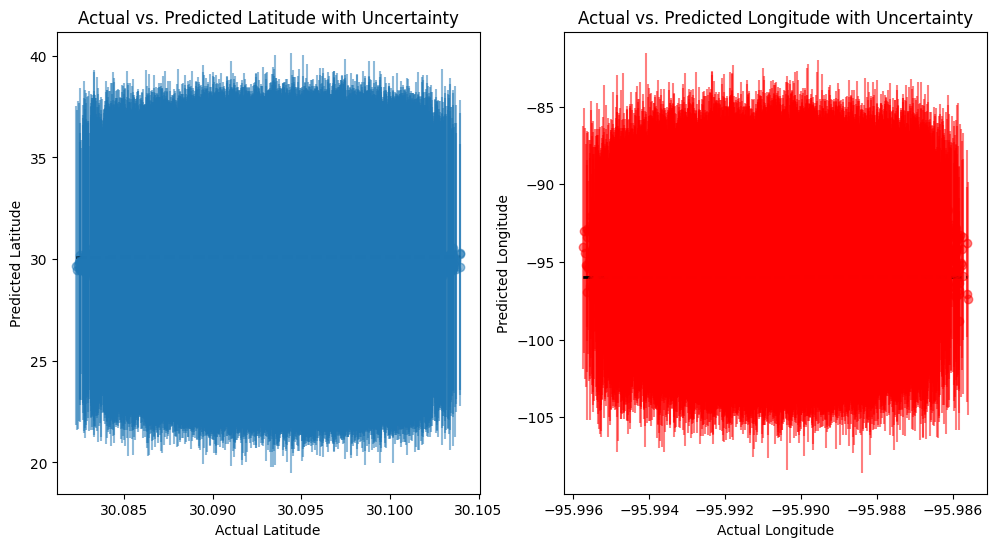

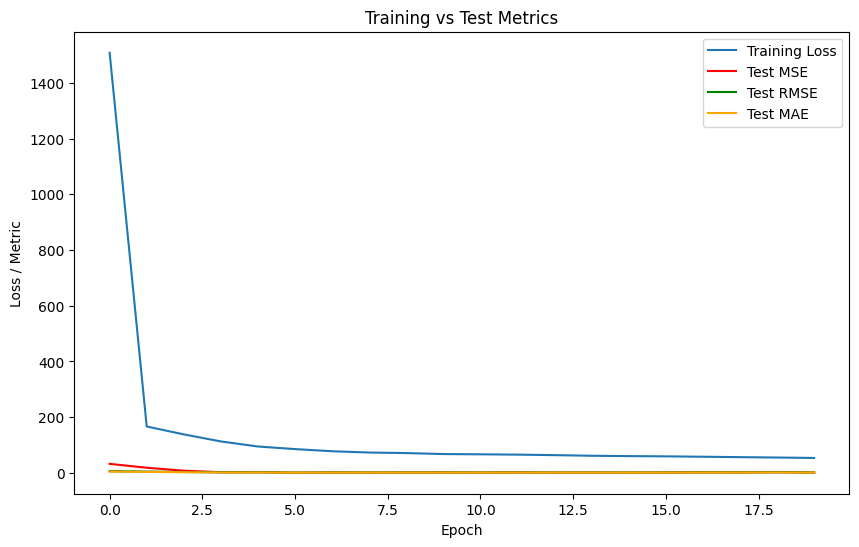

In [ ]:
'''GRAPH NEURAL NETWORK'''

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and preprocess data
data_path = 'C:/Users/shouv/Downloads/data_from_tareq_bhai.csv'  # Update with the correct path
df = pd.read_csv(data_path)
scaler = StandardScaler()
node_features = scaler.fit_transform(df[['RSSI 1', 'RSSI 2', 'RSSI 3', 'SNR 1', 'SNR 2', 'SNR 3', 'TDoA 1', 'TDoA 2', 'TDoA 3']])
targets = df[['Latitude', 'Longitude']].values
node_features = torch.tensor(node_features, dtype=torch.float)
targets = torch.tensor(targets, dtype=torch.float)
X_train, X_test, y_train, y_test = train_test_split(node_features, targets, test_size=0.2, random_state=42)

# Dataset class
class GraphDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = GraphDataset(X_train, y_train)
test_dataset = GraphDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model class with Dropout
class GNN(torch.nn.Module):
    def __init__(self, input_dim, output_dim, dropout_rate=0.5):
        super(GNN, self).__init__()
        self.linear1 = torch.nn.Linear(input_dim, 64)
        self.dropout = torch.nn.Dropout(dropout_rate)
        self.linear2 = torch.nn.Linear(64, output_dim)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.dropout(x)
        x = self.linear2(x)
        return x

model = GNN(input_dim=node_features.shape[1], output_dim=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

# Training function
def train(model, train_loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# Testing function with additional metrics calculation
def test(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            total_loss += criterion(output, target).item()
            actuals.extend(target.detach().numpy())
            predictions.extend(output.detach().numpy())
    mse = total_loss / len(test_loader)
    actuals = np.array(actuals)
    predictions = np.array(predictions)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(actuals - predictions))
    return mse, rmse, mae, actuals, predictions

# Monte Carlo Dropout Inference function
def mc_dropout_inference(model, data_loader, criterion, num_samples=50):
    model.train()  # Set the model to train mode to enable dropout
    total_loss = 0
    actuals = []
    predictions = []
    prediction_samples = []

    for data, target in data_loader:
        batch_predictions = []
        for _ in range(num_samples):
            output = model(data)
            batch_predictions.append(output.unsqueeze(0))

        batch_predictions = torch.cat(batch_predictions, dim=0)
        prediction_samples.append(batch_predictions)
        mean_predictions = batch_predictions.mean(dim=0)
        total_loss += criterion(mean_predictions, target).item()
        actuals.extend(target.detach().numpy())
        predictions.extend(mean_predictions.detach().numpy())

    mse = total_loss / len(data_loader)
    actuals = np.array(actuals)
    predictions = np.array(predictions)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(actuals - predictions))

    # Concatenate prediction samples
    prediction_samples = torch.cat(prediction_samples, dim=1)
    prediction_variance = prediction_samples.var(dim=0).mean(dim=1).detach().numpy()

    return mse, rmse, mae, actuals, predictions, prediction_variance

# Training and evaluation loop
train_losses = []
test_losses = []
test_rmse_values = []
test_mae_values = []

for epoch in range(20):
    train_loss = train(model, train_loader, optimizer, criterion)
    test_mse, test_rmse, test_mae, actuals, predictions = test(model, test_loader, criterion)

    # Store losses and metrics
    train_losses.append(train_loss)
    test_losses.append(test_mse)
    test_rmse_values.append(test_rmse)
    test_mae_values.append(test_mae)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test MSE: {test_mse:.4f}, Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}")

# Final evaluation with Monte Carlo Dropout
test_mse, test_rmse, test_mae, actuals, predictions, prediction_variance = mc_dropout_inference(model, test_loader, criterion)

# Print the variance of predictions
print(f"Prediction Variance: {prediction_variance}")

# Calculate metrics for latitude
mse_lat, rmse_lat, mae_lat = mean_squared_error(actuals[:, 0], predictions[:, 0]), np.sqrt(mean_squared_error(actuals[:, 0], predictions[:, 0])), mean_absolute_error(actuals[:, 0], predictions[:, 0])
# Calculate metrics for longitude
mse_lon, rmse_lon, mae_lon = mean_squared_error(actuals[:, 1], predictions[:, 1]), np.sqrt(mean_squared_error(actuals[:, 1], predictions[:, 1])), mean_absolute_error(actuals[:, 1], predictions[:, 1])

# Average metrics
avg_mse = (mse_lat + mse_lon) / 2
avg_rmse = (rmse_lat + rmse_lon) / 2
avg_mae = (mae_lat + mae_lon) / 2

metrics = {
    "Latitude": {"MSE": mse_lat, "RMSE": rmse_lat, "MAE": mae_lat},
    "Longitude": {"MSE": mse_lon, "RMSE": rmse_lon, "MAE": mae_lon},
    "Average": {"MSE": avg_mse, "RMSE": avg_rmse, "MAE": avg_mae}
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plotting results with uncertainty
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].errorbar(actuals[:, 0], predictions[:, 0], yerr=np.sqrt(prediction_variance), fmt='o', alpha=0.5)
ax[0].plot([actuals[:, 0].min(), actuals[:, 0].max()], [actuals[:, 0].min(), actuals[:, 0].max()], 'k--', lw=2)
ax[0].set_xlabel('Actual Latitude')
ax[0].set_ylabel('Predicted Latitude')
ax[0].set_title('Actual vs. Predicted Latitude with Uncertainty')

ax[1].errorbar(actuals[:, 1], predictions[:, 1], yerr=np.sqrt(prediction_variance), fmt='o', alpha=0.5, color='red')
ax[1].plot([actuals[:, 1].min(), actuals[:, 1].max()], [actuals[:, 1].min(), actuals[:, 1].max()], 'k--', lw=2)
ax[1].set_xlabel('Actual Longitude')
ax[1].set_ylabel('Predicted Longitude')
ax[1].set_title('Actual vs. Predicted Longitude with Uncertainty')

plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test MSE', color='red')
plt.plot(test_rmse_values, label='Test RMSE', color='green')
plt.plot(test_mae_values, label='Test MAE', color='orange')
plt.title('Training vs Test Metrics')
plt.xlabel('Epoch')
plt.ylabel('Loss / Metric')
plt.legend()
plt.show()


Epoch 1/5
1348/1348 [==============================] - 53s 37ms/step - loss: 646.3408 - val_loss: 1.7340e-04
Epoch 2/5
1348/1348 [==============================] - 49s 37ms/step - loss: 3.1940e-05 - val_loss: 1.8887e-04
Epoch 3/5
1348/1348 [==============================] - 48s 36ms/step - loss: 3.1252e-05 - val_loss: 1.6423e-04
Epoch 4/5
1348/1348 [==============================] - 56s 42ms/step - loss: 3.2291e-05 - val_loss: 1.7926e-04
Epoch 5/5
375/375 [==============================] - 5s 11ms/step
      Latitude  Longitude   Average
MSE   0.000036   0.000401  0.000218
RMSE  0.005985   0.020016  0.013001
MAE   0.005010   0.019906  0.012458


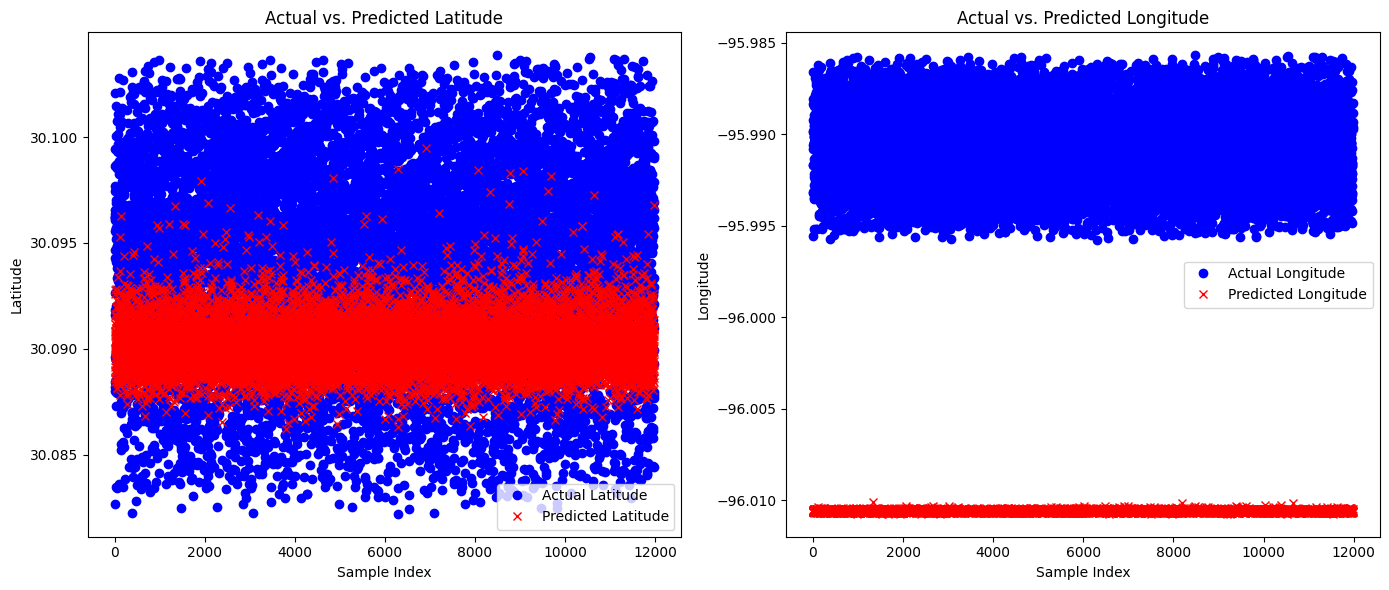

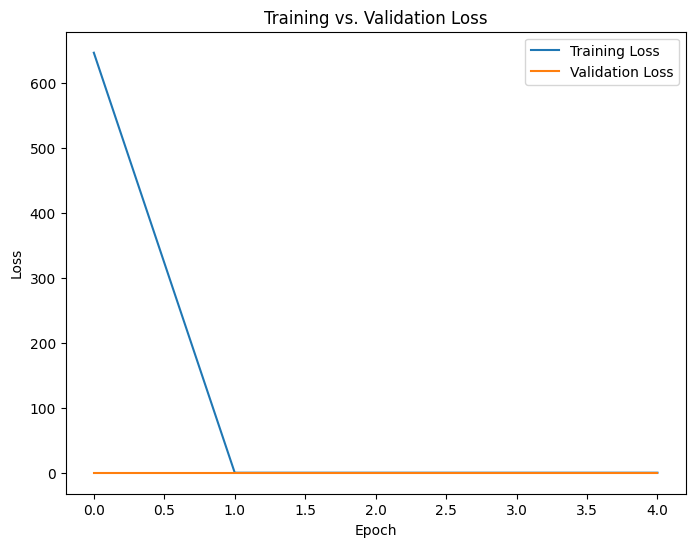

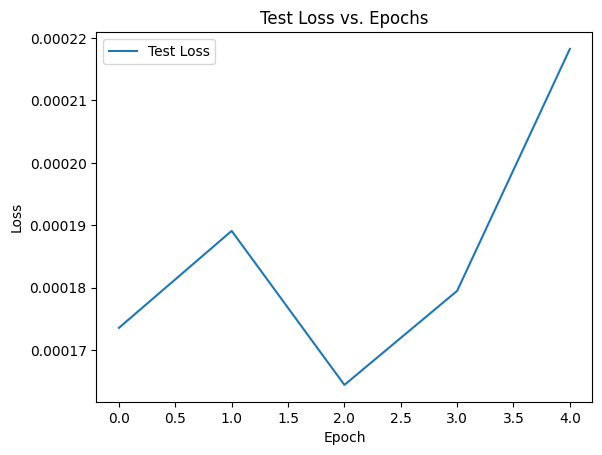

In [ ]:
'''ATTENTION BASED MODEL'''
[ ]


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, Callback
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt

# Load dataset
file_path = 'C:/Users/shouv/Downloads/data_from_tareq_bhai.csv'  # Update with the correct path
data = pd.read_csv(file_path)
features = data.drop(['Node ID', 'Latitude', 'Longitude'], axis=1)
targets = data[['Latitude', 'Longitude']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create sequences
def create_sequences(features, targets, sequence_length=100):
    X, y = [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i:i+sequence_length])
        y.append(targets.iloc[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 100
X, y = create_sequences(features_scaled, targets, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model building function with dropout
def build_transformer_model_with_dropout(sequence_length, num_features, d_model, num_heads, num_encoder_layers, ff_dim, dropout_rate):
    inputs = Input(shape=(sequence_length, num_features))
    x = LayerNormalization(epsilon=1e-6)(inputs)

    for _ in range(num_encoder_layers):
        # Process `x` through the attention mechanism
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(x, x)
        attn_output = Dropout(dropout_rate)(attn_output)
        # Project attn_output to ensure it matches the dimensionality for skip connection
        attn_output_projected = Dense(d_model)(attn_output)

        # Ensure `x` is also projected to d_model dimensions for compatibility
        x_projected = Dense(d_model)(x)

        # Skip connection with proper dimension matching
        x = LayerNormalization(epsilon=1e-6)(x_projected + attn_output_projected)

        # Feed-forward block
        ff_output = Dense(ff_dim, activation='relu')(x)
        ff_output = Dropout(dropout_rate)(ff_output)
        ff_output_projected = Dense(d_model)(ff_output)
        ff_output = Dropout(dropout_rate)(ff_output_projected)

        # Skip connection for feed-forward output, ensuring dimensions match
        x = LayerNormalization(epsilon=1e-6)(x + ff_output)

    x = GlobalAveragePooling1D()(x)
    outputs = Dense(2, activation='linear')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    return model

# Model parameters
num_features = X_train.shape[2]
d_model = 64
num_heads = 2
num_encoder_layers = 2
ff_dim = 256
dropout_rate = 0.1
model = build_transformer_model_with_dropout(sequence_length, num_features, d_model, num_heads, num_encoder_layers, ff_dim, dropout_rate)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

class TestLossCallback(Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.test_losses = []

    def on_epoch_end(self, epoch, logs=None):
        x_test, y_test = self.test_data
        loss = self.model.evaluate(x_test, y_test, verbose=0)
        self.test_losses.append(loss)
        print(f'Test loss: {loss}')

test_loss_callback = TestLossCallback((X_test, y_test))
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1, verbose=1, callbacks=[early_stopping, test_loss_callback])

predictions = model.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

# Calculate metrics for latitude
mse_lat, rmse_lat, mae_lat = calculate_metrics(y_test[:, 0], predictions[:, 0])
# Calculate metrics for longitude
mse_lon, rmse_lon, mae_lon = calculate_metrics(y_test[:, 1], predictions[:, 1])

# Average metrics
avg_mse = (mse_lat + mse_lon) / 2
avg_rmse = (rmse_lat + rmse_lon) / 2
avg_mae = (mae_lat + mae_lon) / 2

metrics = {
    "Latitude": {"MSE": mse_lat, "RMSE": rmse_lat, "MAE": mae_lat},
    "Longitude": {"MSE": mse_lon, "RMSE": rmse_lon, "MAE": mae_lon},
    "Average": {"MSE": avg_mse, "RMSE": avg_rmse, "MAE": avg_mae}
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plotting actual vs predicted values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(y_test[:, 0], 'bo', label='Actual Latitude')
plt.plot(predictions[:, 0], 'rx', label='Predicted Latitude')
plt.title('Actual vs. Predicted Latitude')
plt.xlabel('Sample Index')
plt.ylabel('Latitude')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test[:, 1], 'bo', label='Actual Longitude')
plt.plot(predictions[:, 1], 'rx', label='Predicted Longitude')
plt.title('Actual vs. Predicted Longitude')
plt.xlabel('Sample Index')
plt.ylabel('Longitude')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting test loss over epochs
plt.plot(test_loss_callback.test_losses, label='Test Loss')
plt.title('Test Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
